In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import explore

In [2]:
#df = explore.make_initial_df()
#df = explore.add_new_columns(df)
#df.head()

,repo,language,readme_contents,basic_clean,clean_tokes,lemmatized,clean_lemmatized,gen_language,without_numbers,num_words,num_unique_words,link_counts,py_extensions,js_extensions,ipynb_extensions
0,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://g...",\r\n \r\n \r\n \r\n \r\n\r\n\r...,"[nbspnbsp, nbspnbsp, nbspnbspnbspnbspnbspnbspn...",nbspnbsp nbspnbsp nbspnbspnbspnbspnbspnbspnbsp...,nbspnbsp nbspnbsp nbspnbspnbspnbspnbspnbspnbsp...,Java,nbspnbsp nbspnbsp nbspnbspnbspnbspnbspnbspnbsp...,76,52,76,0,0,0
1,TheAlgorithms/Python,Python,# The Algorithms - Python\n[![Gitpod Ready-to-...,the algorithms python\ngitpod readytocodehtt...,"[the, algorithms, python, gitpod, readytocodeh...",the algorithm python gitpod readytocodehttpsim...,algorithm python gitpod readytocodehttpsimgshi...,Python,algorithm python gitpod readytocodehttpsimgshi...,43,36,17,0,0,0
2,trekhleb/javascript-algorithms,JavaScript,# Algoritmos y Estructuras de Datos en JavaScr...,algoritmos y estructuras de datos en javascri...,"[algoritmos, y, estructuras, de, datos, en, ja...",algoritmos y estructuras de datos en javascrip...,algoritmos estructuras de datos en javascript ...,JavaScript,algoritmos estructuras de datos en javascript ...,1718,593,7,0,2,0
3,kdn251/interviews,Java,> * 原文地址：[github.com/kdn251/interviews](https:...,githubcomkdn251interviewshttpsgithubcomkdn25...,[githubcomkdn251interviewshttpsgithubcomkdn251...,githubcomkdn251interviewshttpsgithubcomkdn251i...,githubcomkdn251interviewshttpsgithubcomkdn251i...,Java,githubcomkdn251interviewshttpsgithubcomkdn251i...,443,293,29,0,0,0
4,yangshun/tech-interview-handbook,JavaScript,"<h1 align=""center"">Tech Interview Handbook</h1...",tech interview handbook\n\n\n \n \n \n \...,"[tech, interview, handbook, credits, illustrat...",tech interview handbook credit illustration by...,tech interview handbook credit illustration ya...,JavaScript,tech interview handbook credit illustration ya...,364,235,55,0,0,0


In [18]:
df.to_csv('prepared_df.csv')
df = pd.read_csv('prepared_df.csv')

In [3]:
word_counts_df = explore.make_word_counts_df(df)
word_counts_df.head()

,all,python,javascript,jupyter,c_plus,typescript,java,other
0,537,348,88,15,59,3,4,20
00,30,0,0,30,0,0,0,0
000,2,2,0,0,0,0,0,0
0000,7,1,0,3,2,0,0,1
000000,2,0,0,2,0,0,0,0


In [4]:
vectorized_df = explore.make_vectorized_df(df)
vectorized_df.head()

,00,000,0000,000000,00008100,0001twosumproblems1twosumenmd,0002,0003,0004732,0004medianoftwosortedarrayproblems4medianoftwosortedarraymd,...,zxf,zxvf,zynga,zyszyshttpsgithubcomzyszys,num_words,num_unique_words,link_counts,py_extensions,js_extensions,ipynb_extensions
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76,52,76,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43,36,17,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1718,593,7,0,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,443,293,29,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,364,235,55,0,0,0


In [5]:
vectorized_df.shape

(298, 41840)

In [6]:
X = vectorized_df
y = df.gen_language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)

scaler, X_train_scaled, X_test_scaled = explore.min_max_scaler(X_train, X_test)
X_train_scaled.shape, X_test_scaled.shape

((208, 41840), (90, 41840))

In [7]:
# drop all columns with an average of < 5% tfidf value
X_train_reduced = X_train_scaled[X_train_scaled.columns[X_train_scaled.mean() > .05]]
X_train_reduced

,100,12,14,15,36,able,across,add,already,also,...,web,well,window,without,work,working,would,num_words,num_unique_words,link_counts
182,0.295209,0.0,0.0,0.000000,0.558412,0.470935,0.000000,0.000000,0.208175,0.270673,...,0.000000,0.117613,0.319703,0.475983,0.371556,0.000000,0.000000,0.107001,0.176735,0.064683
63,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.722683,0.000000,...,0.261281,0.408293,0.000000,0.000000,0.000000,0.000000,0.000000,0.023104,0.058776,0.034929
255,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.448277,...,0.000000,0.292177,0.000000,0.000000,0.000000,0.000000,0.000000,0.035473,0.088980,0.037516
88,0.249156,0.0,0.0,0.257551,0.471298,0.000000,0.677362,0.046381,0.351399,0.228447,...,0.000000,0.099265,0.269829,0.535638,0.156796,0.000000,0.119778,0.175846,0.307347,0.094437
125,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.182792,0.000000,0.000000,...,0.250352,0.000000,0.000000,0.527755,0.000000,0.000000,0.000000,0.016803,0.042449,0.014230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321490,...,0.268184,0.000000,0.000000,0.000000,0.000000,0.421028,0.000000,0.016569,0.044490,0.007762
252,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035006,0.103673,0.063389
271,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.067530,0.000000,0.000000,...,0.000000,0.289057,0.000000,0.194971,0.114147,0.000000,0.000000,0.068028,0.153878,0.249677
221,0.029860,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.422446,0.084227,0.036504,...,0.000000,0.000000,0.032338,0.096291,0.037583,0.000000,0.028710,0.254026,0.345714,0.029754


In [8]:
# make X_test have the same columns as X_train
reduced_list = X_train_reduced.columns.tolist()
reduced_list

['100',
 '12',
 '14',
 '15',
 '36',
 'able',
 'across',
 'add',
 'already',
 'also',
 'always',
 'another',
 'around',
 'author',
 'available',
 'based',
 'bash',
 'best',
 'bug',
 'build',
 'building',
 'called',
 'cd',
 'change',
 'check',
 'clone',
 'code',
 'come',
 'command',
 'community',
 'complete',
 'contact',
 'contributing',
 'contributor',
 'core',
 'could',
 'create',
 'creating',
 'current',
 'data',
 'deep',
 'dependency',
 'design',
 'designed',
 'developed',
 'developer',
 'development',
 'different',
 'directory',
 'documentation',
 'dont',
 'download',
 'easily',
 'easy',
 'eg',
 'either',
 'email',
 'environment',
 'etc',
 'even',
 'every',
 'example',
 'fast',
 'feature',
 'file',
 'first',
 'following',
 'found',
 'free',
 'general',
 'get',
 'getting',
 'github',
 'give',
 'graph',
 'ha',
 'help',
 'however',
 'idea',
 'image',
 'including',
 'information',
 'install',
 'installation',
 'installed',
 'installing',
 'instead',
 'interactive',
 'issue',
 'join',
 '

In [9]:
X_test_reduced = X_test_scaled[reduced_list]
X_test_reduced.head()

,100,12,14,15,36,able,across,add,already,also,...,web,well,window,without,work,working,would,num_words,num_unique_words,link_counts
54,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.001400,0.004898,0.011643
112,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138706,0.525445,0.0,...,0.0,0.0,0.000000,0.000000,0.468914,0.0,0.0,0.036523,0.098367,0.173351
66,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.022287,0.058776,0.034929
247,0.0,0.0,0.0,0.0,0.0,0.0,0.312441,0.000000,0.000000,0.0,...,0.0,0.0,0.124462,0.123535,0.072324,0.0,0.0,0.095916,0.168163,0.090556
120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.004201,0.013469,0.014230


In [10]:
X_test_reduced.shape

(90, 207)

In [11]:
# test prep_vectorized_df function from explore
X_train_reduced, X_test_reduced = explore.prep_vectorized_df(df, vectorized_df)

In [20]:
X_train_reduced.shape, X_test_reduced.shape

((208, 234), (90, 233))

### Investigate the distribution of variables

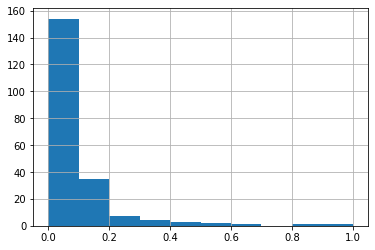

In [12]:
X_train_reduced.num_words.hist()

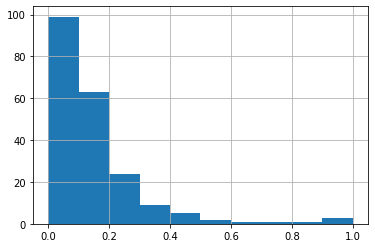

In [13]:
X_train_reduced.num_unique_words.hist()

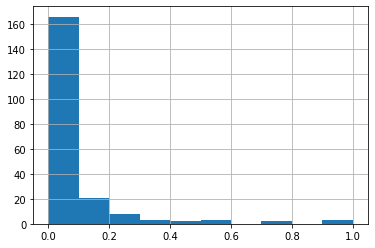

In [14]:
X_train_reduced.link_counts.hist()

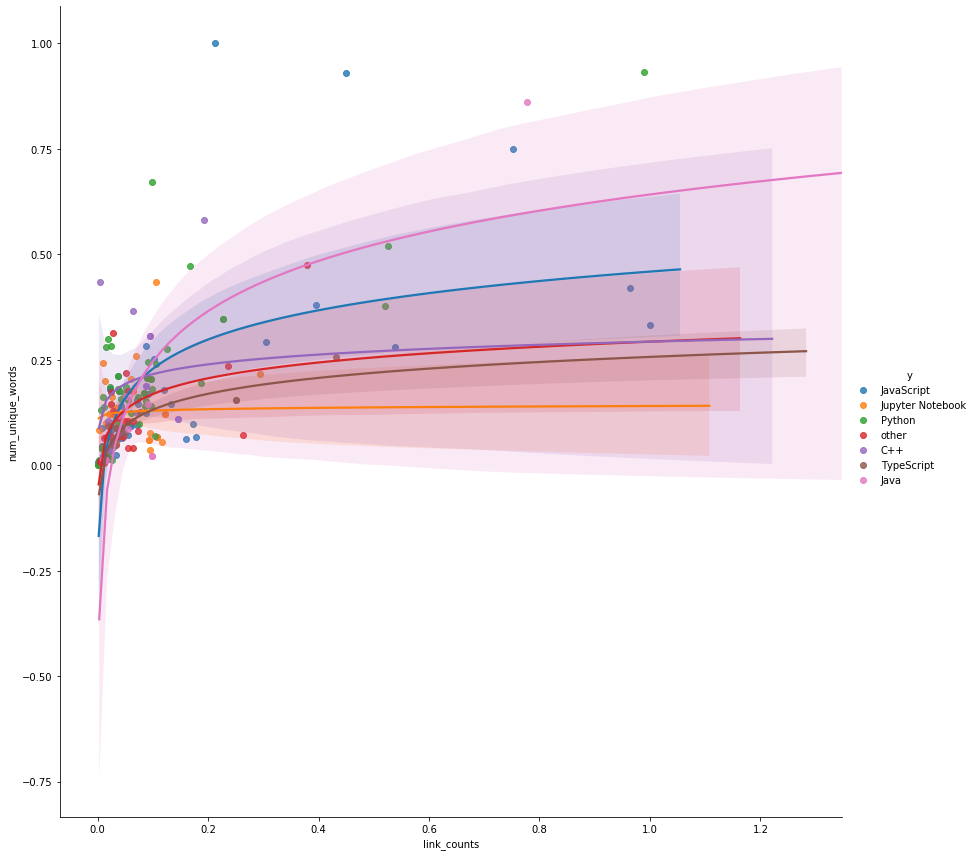

In [34]:
# add y back in to see how the language affects relationships in variables
X_train_reduced['y'] = df.gen_language
sns.lmplot(x='link_counts', y='num_unique_words', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)

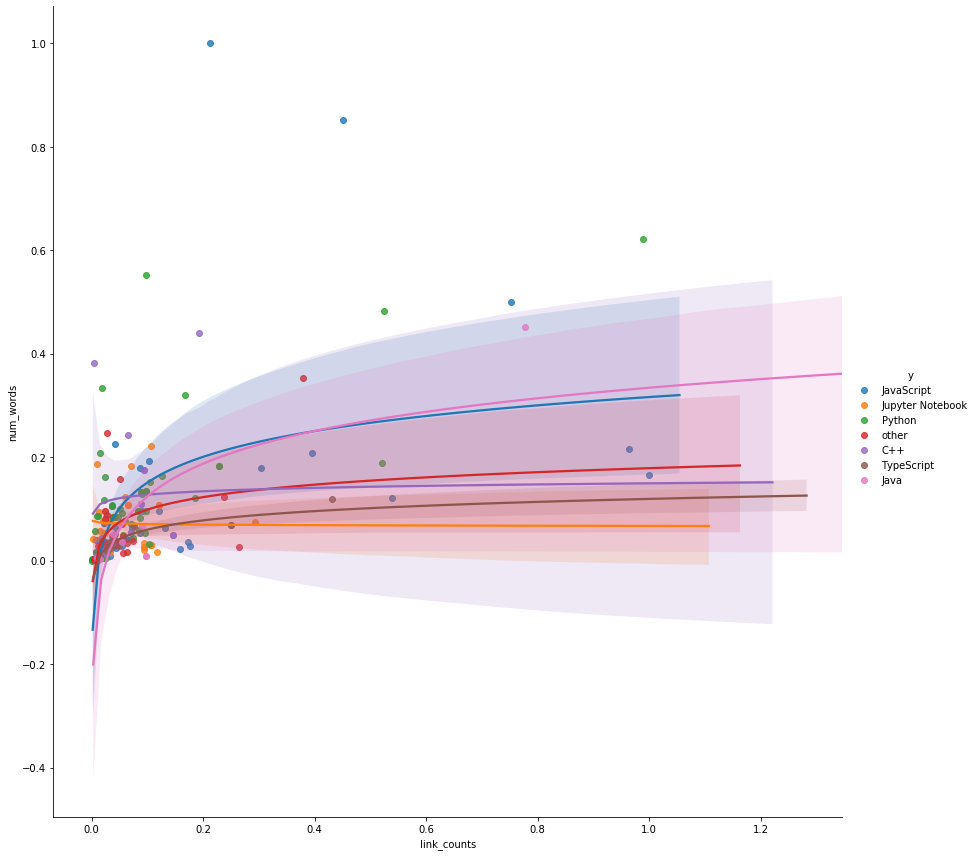

In [35]:
sns.lmplot(x='link_counts', y='num_words', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)

In [21]:
# Add new column, aggregating all numeric variables into one, then drop those individual variables
# Also aggregate similar words together
list_of_words = X_train_reduced.columns.tolist()
list_of_words

['10',
 '100',
 '36',
 'add',
 'additional',
 'already',
 'also',
 'alternatively',
 'analysis',
 'api',
 'application',
 'author',
 'available',
 'based',
 'basic',
 'best',
 'box',
 'bug',
 'build',
 'building',
 'built',
 'called',
 'case',
 'cd',
 'change',
 'check',
 'clone',
 'code',
 'come',
 'command',
 'common',
 'community',
 'complete',
 'complex',
 'contains',
 'contribute',
 'contributing',
 'contributor',
 'core',
 'could',
 'create',
 'created',
 'creating',
 'current',
 'data',
 'deep',
 'dependency',
 'design',
 'designed',
 'detail',
 'developed',
 'developer',
 'development',
 'different',
 'directory',
 'distributed',
 'distribution',
 'documentation',
 'dont',
 'download',
 'easily',
 'easy',
 'eg',
 'either',
 'enable',
 'environment',
 'etc',
 'even',
 'example',
 'fast',
 'feature',
 'feel',
 'file',
 'first',
 'follow',
 'following',
 'form',
 'found',
 'free',
 'fully',
 'generate',
 'get',
 'getting',
 'git',
 'github',
 'give',
 'group',
 'ha',
 'handle',
 '

In [23]:
def aggregate_columns(df):
    df['numbers'] = df['10'] + df['100'] + df['36']
    df['add+'] = df['add'] + df['additional']
    df['build+'] = df['build'] + df['building'] + df['built']
    df['contribute+'] = df['contribute'] + df['contributing'] + df['contributor']
    df['create+'] = df['create'] + df['created'] + df['creating']
    df['design+'] = df['design'] + df['designed']
    df['developed+'] = df['developed'] + df['developer'] + df['development']
    df['distributed+'] = df['distributed'] + df['distribution']
    df['follow+'] = df['follow'] + df['following']
    df['get+'] = df['get'] + df['getting']
    df['git+'] = df['git'] + df['github']
    df['install+'] = df['install'] + df['installation'] + df['installed'] + df['installing']
    df['provide+'] = df['provided'] + df['provides']
    df['recommend+'] = df['recommend'] + df['recommended']
    df['release+'] = df['release'] + df['released']
    df['require+'] = df['required'] + df['requirement'] + df['requires']
    df['run+'] = df['run'] + df['running']
    df['start+'] = df['start'] + df['started']
    df['support+'] = df['support'] + df['supported']
    df['use+'] = df['usage'] + df['use'] + df['used'] + df['useful'] + df['using']
    df['work+'] = df['work'] + df['working']

    replaced_columns = ['10', '100', '36', 'add', 'additional', 'build', 'building', 'built',
                        'contribute', 'contributing', 'contributor', 'create', 'created', 
                        'creating', 'design', 'designed', 'developed', 'developer', 'development', 
                        'distributed', 'distribution', 'follow', 'following', 'get', 'getting', 
                        'git', 'github', 'install', 'installation', 'installed', 'installing', 
                        'provided', 'provides', 'recommend', 'recommended', 'release', 'released',  
                        'required', 'requirement', 'requires', 'run', 'running', 'start', 'started', 
                        'support', 'supported', 'usage', 'use', 'used', 'useful', 'using', 'work', 'working']

    df = df.drop(labels=replaced_columns, axis=1)
    return df

X_train_reduced = aggregate_columns(X_train_reduced)

X_train_reduced.shape

(208, 202)

In [24]:
X_test_reduced = aggregate_columns(X_test_reduced)
X_test_reduced.shape

(90, 201)

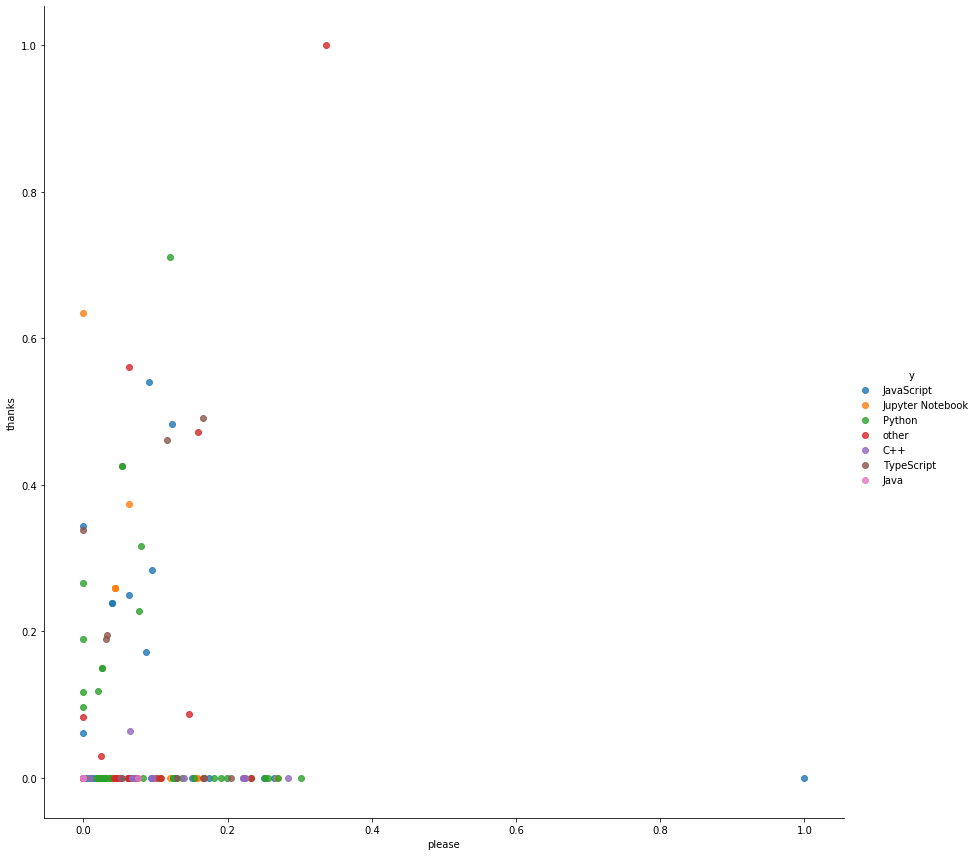

In [36]:
# visualize please & thanks
sns.lmplot(x='please', y='thanks', data=X_train_reduced, hue='y',
           height=12, legend_out=True, logx=True)